In [1]:
import numpy as np
import pandas as pd
from IPython.display import SVG
import matplotlib.pyplot as plt
from utils import download_list, drive_download
%matplotlib inline 

In [9]:
# https://drive.google.com/file/d/11zuiHlBcpPia1UctQceogt1KiB4G6Yg7/view?usp=sharing
# https://drive.google.com/file/d/170Me2wb5yS1zWpCcGp0zC7ur2iCDlR8X/view?usp=sharing
# drive_download("11zuiHlBcpPia1UctQceogt1KiB4G6Yg7", "./kmnist_classmap.csv") # For 10 classes
drive_download("170Me2wb5yS1zWpCcGp0zC7ur2iCDlR8X", "./k49_classmap.csv") # For 49 classes

Downloading...
From: https://drive.google.com/uc?id=11zuiHlBcpPia1UctQceogt1KiB4G6Yg7
To: /content/kmnist_classmap.csv
100%|██████████| 151/151 [00:00<00:00, 514kB/s]


In [ ]:
download_list(49, "npz")

In [2]:
IMG_ROWS = 28
IMG_COLS = 28
NUM_CLASSES = 49
TEST_SIZE = 0.1
RANDOM_STATE = 404

In [3]:
train_images = np.load('./k49-train-imgs.npz')['arr_0']
test_images = np.load('./k49-test-imgs.npz')['arr_0']
train_labels = np.load('./k49-train-labels.npz')['arr_0']
test_labels = np.load('./k49-test-labels.npz')['arr_0']

In [4]:
tmp_map = """
a
i
u
e
o
ka
ki
ku
ke
ko
sa
shi
su
se
so
ta
chi
tsu
te
to
na
ni
nu
ne
no
ha
hi
fu
he
ho
ma
mi
mu
me
mo
ya
yu
yo
ra
ri
ru
re
ro
wa
_
_
o
n
_""".split("\n")
tmp_map = [i.strip("") for i in tmp_map if len(i.strip())]
print(*tmp_map)

a i u e o ka ki ku ke ko sa shi su se so ta chi tsu te to na ni nu ne no ha hi fu he ho ma mi mu me mo ya yu yo ra ri ru re ro wa _ _ o n _


In [5]:
char_df = pd.read_csv('./k49_classmap.csv', encoding = 'utf-8')
char_df["romaji"] = tmp_map
char_df

,index,codepoint,char,romaji
0,0,U+3042,あ,a
1,1,U+3044,い,i
2,2,U+3046,う,u
3,3,U+3048,え,e
4,4,U+304A,お,o
5,5,U+304B,か,ka
6,6,U+304D,き,ki
7,7,U+304F,く,ku
8,8,U+3051,け,ke
9,9,U+3053,こ,ko


In [6]:
f'Percent for each category: {np.bincount(train_labels)/len(train_labels)*100}'

'Percent for each category: [2.58214447 2.58214447 2.58214447 0.33438771 2.58214447 2.58214447\n 2.58214447 2.58214447 2.02870484 2.58214447 2.58214447 2.58214447\n 2.58214447 1.79243862 1.66419211 2.58214447 1.10386676 2.58214447\n 2.58214447 2.58214447 2.58214447 2.58214447 0.88782734 1.05480602\n 2.58214447 2.58214447 2.20859424 2.58214447 2.58214447 0.85770232\n 2.58214447 1.31689368 0.73935403 1.46063306 2.58214447 2.58214447\n 0.68771114 2.58214447 2.58214447 2.58214447 2.58214447 2.58214447\n 0.9205345  1.03156672 0.17945904 0.16870011 2.58214447 2.58214447\n 1.51614916]'

In [7]:
train_labels

array([30, 19, 20, ..., 10, 39, 30], dtype=uint8)

In [8]:
labels = char_df['romaji']
from collections import Counter
ct = Counter(train_labels)
ct

Counter({30: 6000,
         19: 6000,
         20: 6000,
         7: 6000,
         4: 6000,
         35: 6000,
         24: 6000,
         43: 2397,
         46: 6000,
         25: 6000,
         15: 6000,
         27: 6000,
         47: 6000,
         12: 6000,
         13: 4165,
         10: 6000,
         37: 6000,
         40: 6000,
         0: 6000,
         2: 6000,
         6: 6000,
         1: 6000,
         8: 4714,
         18: 6000,
         21: 6000,
         41: 6000,
         39: 6000,
         28: 6000,
         26: 5132,
         34: 6000,
         3: 777,
         14: 3867,
         31: 3060,
         38: 6000,
         5: 6000,
         44: 417,
         42: 2139,
         16: 2565,
         36: 1598,
         22: 2063,
         48: 3523,
         33: 3394,
         17: 6000,
         45: 392,
         9: 6000,
         11: 6000,
         23: 2451,
         29: 1993,
         32: 1718})

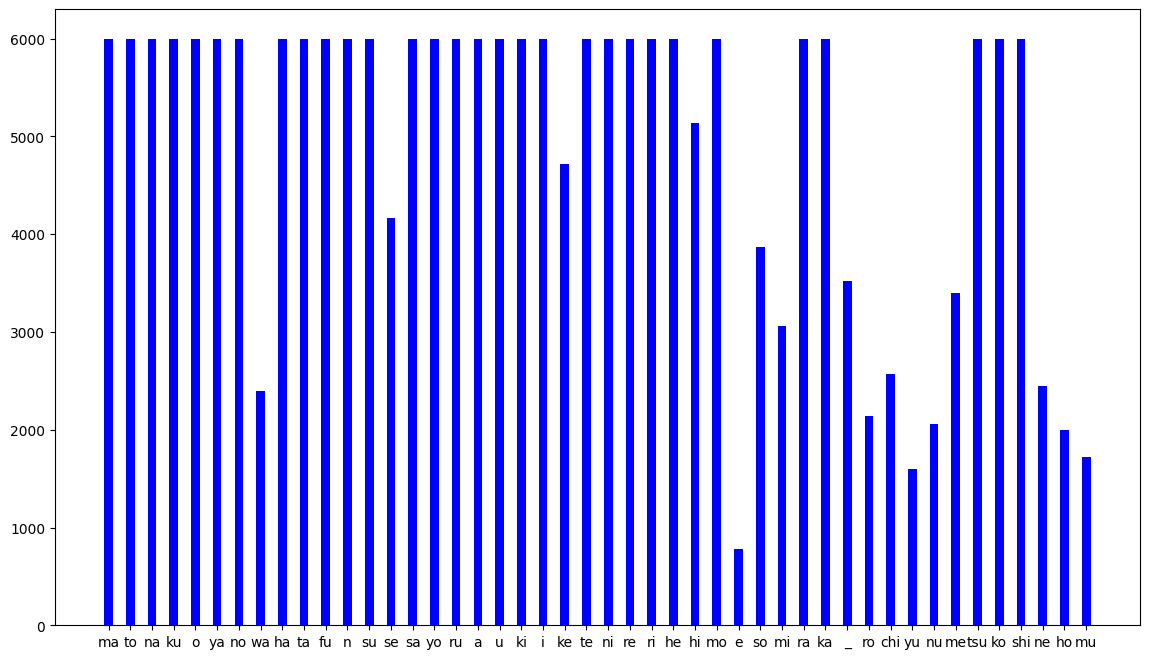

In [9]:
plt.figure(figsize=(14, 8))
plt.bar([labels[int(i)] for i in list(ct.keys())], list(ct.values()), color ='blue', width = 0.4)
plt.show()

In [10]:
def plot_sample_imaes(images, labels, map_labels):
    plt.figure(figsize=(10, 6))
    random_idx = [i for i in range(15)]
    np.random.shuffle(random_idx)
    for index_plt, idx in enumerate(random_idx, 1):
        image = images[idx]
        label = labels[idx]
        label = map_labels[int(label)]
        plt.subplot(3, 5, index_plt)
        plt.grid(False)
        plt.imshow(image, cmap=plt.cm.binary)
        plt.xlabel(label)

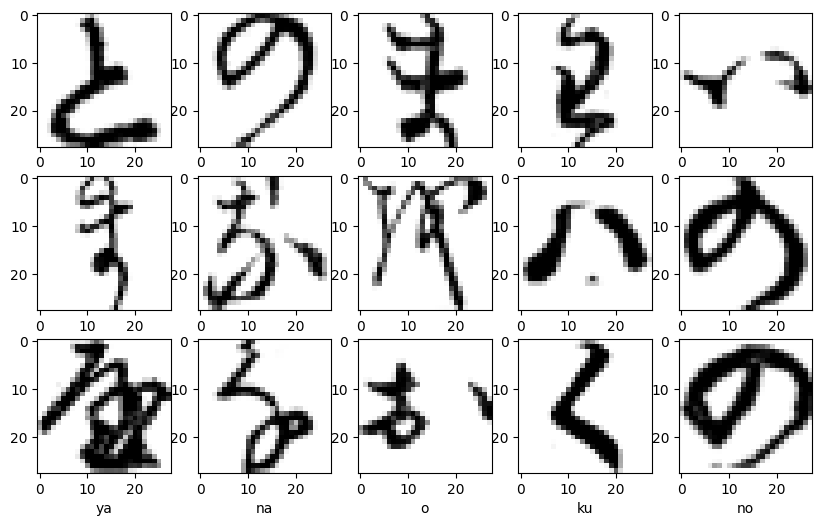

In [11]:
plot_sample_imaes(train_images, train_labels, labels)

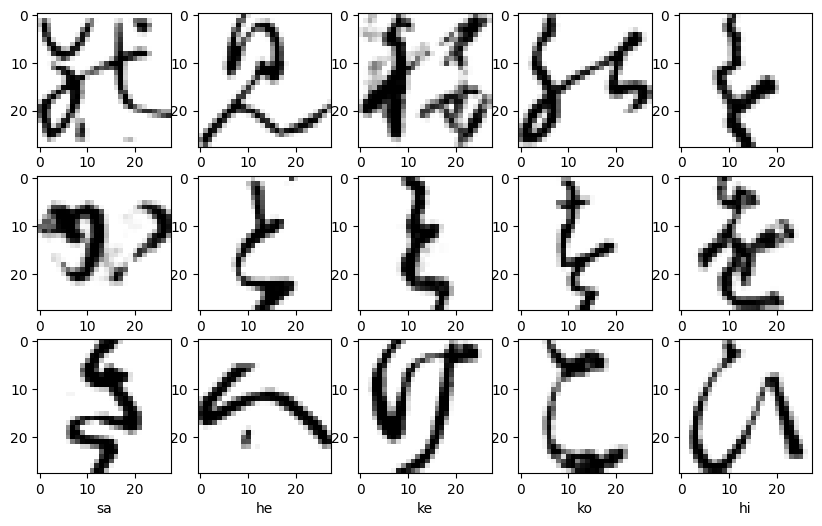

In [12]:
plot_sample_imaes(test_images, test_labels, labels)